We may also want to do math on pandas data.  So to do this I thought we could convert our units.  

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
well_data=pd.read_csv('well_data.csv')

I did not talk about units except for Arsenic.  But we have the following elements and their units.  

    'Si':ppb,
    'P':ppm,
    'S':ppb,
    'Ca':ppb,
    'Fe':ppm,
    'Ba':ppb,
    'Na':ppm,
    'Mg':ppb,
    'K':ppb,
    'Mn':ppm,
    'As':ppb,
    'Sr':ppb,
    'F':ppm,
    'Cl':ppm,
    'SO4':ppm,
    'Br':ppm

Remember back to chemistry........ 

ppm=parts per million = milligrams per liter = mg/l

ppb=parts per billions = micrograms per liter = ug/l

we can convert between these two.  1000 ppb = 1 ppm  or 
to convert 

##$1 \frac{mg}{l} * \frac{1000 u}{m}= 1000 \frac{ug}{l}$



 

So lets convert As to ppm.  It is now ppb.  We could just print it first

In [3]:
print well_data.As/1000

0           NaN
1           NaN
2           NaN
3      0.078977
4           NaN
5           NaN
6      0.028071
7           NaN
8      0.096886
9      0.080627
10          NaN
11     0.077007
12     0.039250
13     0.131249
14     0.000177
15          NaN
16          NaN
17     0.147639
18          NaN
19     0.052427
20          NaN
21          NaN
22          NaN
23          NaN
24     0.005365
25          NaN
26          NaN
27          NaN
28     0.053098
29          NaN
         ...   
729    0.165760
730         NaN
731    0.000180
732    0.093650
733    0.101430
734         NaN
735         NaN
736    0.087900
737         NaN
738    0.001170
739    0.085260
740    0.055750
741    0.026960
742         NaN
743         NaN
744         NaN
745         NaN
746         NaN
747         NaN
748    0.000120
749    0.031690
750    0.009150
751    0.026980
752    0.021740
753    0.117820
754    0.000130
755    0.017390
756    0.112370
757    0.248930
758         NaN
Name: As, dtype: float64

that didn't change it.  We could set a new column.

In [4]:
well_data['As-ppm']=well_data.As/1000

In [5]:
print well_data.describe()

             Well_ID         Lat         Lon       Depth            Si  \
count     759.000000  759.000000  759.000000  759.000000    407.000000   
mean     6417.088274   23.789249   90.641199   65.554677  40101.151444   
std      6695.778189    0.578493    0.578800   42.186161  10117.680290   
min         2.000000   22.780000   89.610000    0.000000  12605.576700   
25%      4116.000000   23.285000   90.155000   45.000000  33200.310900   
50%      5928.000000   23.790000   90.650000   50.000000  40021.490000   
75%      8134.500000   24.300000   91.130000   70.000000  45369.825000   
max    141499.000000   24.770000   91.650000  523.000000  70304.057950   

                P             S             Ca          Fe          Ba  \
count  407.000000    407.000000     407.000000  407.000000  407.000000   
mean     0.809323   3407.292389   41129.291921    5.556200   89.078507   
std      0.902860   5364.247733   20161.130827    5.153779   54.172650   
min      0.008210    -41.390000    35

or we could have just looked at column titles

In [6]:
well_data.columns

Index([u'Well_ID', u'Lat', u'Lon', u'Depth', u'Drink', u'Si', u'P', u'S',
       u'Ca', u'Fe', u'Ba', u'Na', u'Mg', u'K', u'Mn', u'As', u'Sr', u'F',
       u'Cl', u'SO4', u'Br', u'As-ppm'],
      dtype='object')

We could delete our new column now

In [7]:
del well_data['As-ppm']

We could also just convert the As column itself.  

In [8]:
well_data.As/=1000

In [9]:
print well_data.As.describe()

count    407.000000
mean       0.089689
std        0.101531
min        0.000000
25%        0.014027
50%        0.054400
75%        0.129433
max        0.700890
Name: As, dtype: float64


It worked wonderfully.  

We sometimes want molar concentrations.  I can't cross out the math on the screen but we can use the elemental weights to convert 

from parts per billion to micromolar

from parts per million to millimolar. 

for example

##$\frac{mg}{l}*\frac{1 Mole}{grams in one mole}=\frac{mM}{l}=mM$

The average arsenic is 0.0897 mg/l

##$0.0897\frac{mg}{l}*\frac{M}{74.921}=0.001197mM$

Now lets try on our data.  


In [10]:
well_data.As/=74.921
print well_data.As.describe()

count    407.000000
mean       0.001197
std        0.001355
min        0.000000
25%        0.000187
50%        0.000726
75%        0.001728
max        0.009355
Name: As, dtype: float64


It worked beautifully.  But that number is too small.  So I will convert to micromolar by multibplying by 1000. 

In [26]:
well_data.As*=1000
print well_data.As.describe()

count    407.000000
mean       1.197109
std        1.355169
min        0.000000
25%        0.187222
50%        0.726098
75%        1.727597
max        9.355054
dtype: float64


But we have up to 16 elements we may want to convert.  Could we convert them all ot once.  Before Code Academeny I didn't know how to do this.  But then I remember dictionary's that we learned about in code academy.  I usually don't use them much.  But now I can see their usefullness.  I made a a dictionary with the formula weights for all the elements we have using this website.  http://www.ptable.com/

In [13]:
FW={
    'Si':28.1,
    'P':30.97,
    'S':32.06,
    'Ca':40.078,
    'Fe':55.845,
    'Ba':137.326,
    'Na':22.989,
    'Mg':24.305,
    'K':29.0983,
    'Mn':54.938,
    'As':74.921,
    'Sr':87.62,
    'F':18.998,
    'Cl':35.45,
    'SO4':32.06+4*15.99,
    'Br':79.904
}

In [14]:
#I am just re-reading in the data to start fresh.
well_data=pd.read_csv('well_data.csv')

Unfortantely I couldn't just multiply the two.  But we could first try this. 

In [15]:
for i in well_data:
    well_data[i]=well_data[i]*FW[i]

KeyError: 'Well_ID'

The trouble is well_id doesn't work.......  So we need to first make sure that i is both in FW and well_data

In [17]:
for i in well_data:
    if i in FW:
        well_data[i]=well_data[i]/FW[i]

In [18]:
print well_data.describe()

             Well_ID         Lat         Lon       Depth          Si  \
count     759.000000  759.000000  759.000000  759.000000  407.000000   
mean     6417.088274   23.789249   90.641199   65.554677   50.786023   
std      6695.778189    0.578493    0.578800   42.186161   12.813516   
min         2.000000   22.780000   89.610000    0.000000   15.964307   
25%      4116.000000   23.285000   90.155000   45.000000   42.046467   
50%      5928.000000   23.790000   90.650000   50.000000   50.685136   
75%      8134.500000   24.300000   91.130000   70.000000   57.458524   
max    141499.000000   24.770000   91.650000  523.000000   89.036433   

                P           S          Ca          Fe          Ba          Na  \
count  407.000000  407.000000  407.000000  407.000000  407.000000  407.000000   
mean     0.000844    3.314991   25.605847    0.001782    0.004724    0.055708   
std      0.000941    5.218934   12.551707    0.001653    0.002873    0.033848   
min      0.000009   -0.0402

done.  easy-peasy math! 

I got thinking more about dictionary's.  Could we use them to also make awesome looking Axis names given the short names?

I got yelled at b/c I didn't have units on our graph from last time. But there is no good way to know all the units.......  So I figured I could make a dictionary of what I want each axis to be.  Here is a page that describes it all!  I am going to do a few examples! http://matplotlib.org/users/mathtext.html

In [64]:
units={
    'Si':'Si (ppb)',
    'P':'Phosphourous (ppm)',
    'S':r'Sulfur $\left(\frac{\mu g}{L} \right)$',
    'Ca':'pbb',
    'Fe':'Fe (mgL$^-1$)',
    'Ba':'ppb',
    'Na':'Sodium is boring',
    'Mg':'ppm',
    'K':'ppb',
    'Mn':'ppm',
    'As':'Arsenic (ppb)',
    'Sr':'ppb',
    'F':'ppm',
    'Cl':'ppm',
    'SO4':'ppm',
    'Br':'ppm'
}

In [56]:
for i in well_data:
    if i in units:
        print units[i]

Si (ppb)
Phosphourous (ppm)
Sulfur $\left \frac{\mu g}{L} \right$
pbb
ppm
ppb
ppm
ppm
ppb
ppm
ppb
ppb
ppm
ppm
ppm
ppm


So lets go back and grab our graph and try it! But reread your data since you unit converted the 10,50 are wrong

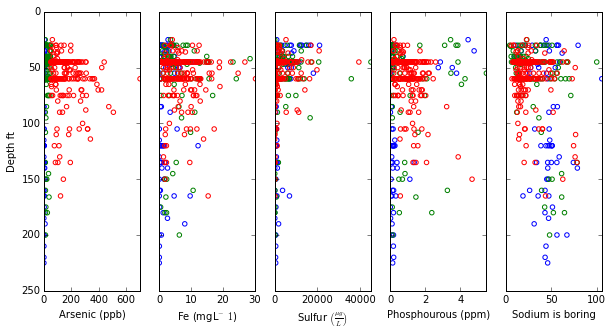

In [65]:
well_data=pd.read_csv('well_data.csv')
elems=['As','Fe','S','P','Na']
f, ax = plt.subplots(1, len(elems), sharey=True)
f.set_size_inches(10,5)

for i,elem in enumerate(elems):
    ax[i].scatter(well_data[elem][well_data.As<10],well_data.Depth[well_data.As<10],edgecolors='b',label='<10',facecolor='none')
    ax[i].scatter(well_data[elem][np.logical_and(well_data.As>=10,well_data.As<=50)],well_data.Depth[np.logical_and(well_data.As>=10,well_data.As<=50)],edgecolors='g',label='10-50',facecolor='none')
    ax[i].scatter(well_data[elem][well_data.As>50],well_data.Depth[well_data.As>50],edgecolors='r',label='>50',facecolor='none')

    ax[i].set_xlabel(units[elem])

    ax[i].set_xlim([0,well_data[elem].max()])
    ax[i].xaxis.major.locator.set_params(nbins=4) 

ax[0].set_ylim([250,0])
ax[0].set_ylabel('Depth ft')